## pyCEDFS Demonstration
CFS file can be accessed by creating a CFS object with ` pyCEDFS.CFS(filepath) ` . Upon initialization, the CFS file is opened, all data is loaded into memory, and the CFS file is then closed.

In [20]:
import pyCEDFS
from IPython.display import display, HTML
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

CFS = pyCEDFS.CFS('C:\\Users\\SMest\\Documents\\Signal Demo\\Data\\Actions.cfs') ##Call pyCEDFS.CFS with a pathname to load the data.

Sweep data is loaded into the dataX, dataY attributes. These are lists containing numpy arrrays for each channel.
Data can be accessed through:
```
CFS.dataX[Channel][sweep, point]
```

In [3]:
dataY = CFS.dataY
print(f"Loaded {len(dataY)} channels from the file")
print(f"Channel 0 has {dataY[0].shape} (sweeps, points)")

Loaded 2 channels from the file
Channel 0 has (12, 20644) (sweeps, points)


A plotting method is provided for quick debugging

<Figure size 720x720 with 0 Axes>

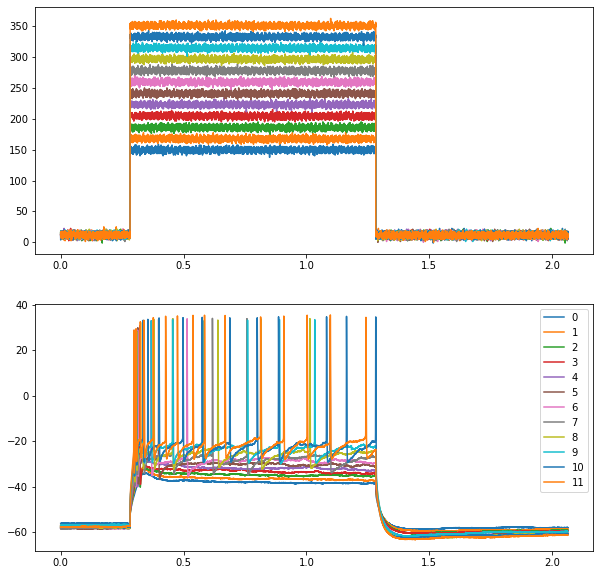

In [4]:
plt.figure(figsize=(10,10))
CFS._debug_plot()
plt.legend()

Metadata is accessible via the various attributes of the object. For example, channel vars are stored in ` chVars `, file vars in ` fileVars ` etc. As of the current implementation these are lists of python dict objects.

In [11]:
print(dir(CFS)) ##Show the attributes of the CFS Object

['cfsFilePath', 'cfsFolderPath', 'CFSID', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_build_attr_from_dict', '_build_ch_vars', '_build_ds_vars', '_build_dsch_vars', '_build_file_vars', '_debug_plot', '_fileHandle', '_read_data', 'chVars', 'channelList', 'channels', 'dataX', 'dataY', 'datasetChaVars', 'datasetList', 'datasetVarsCount', 'datasets', 'dsVars', 'fileComment', 'fileDate', 'fileTime', 'fileVars', 'fileVarsCount', 'sweepList', 'sweeps']


In [12]:
print(CFS.fileVars) ## The array of files vars

[{'desc': 'CED Signal Program', 'size': 2, 'units': 'Signal', 'type': 'INT2', 'value': 307}, {'desc': 'FCom1', 'size': 80, 'units': '', 'type': 'LSTR', 'value': ''}, {'desc': 'FCom2', 'size': 80, 'units': '', 'type': 'LSTR', 'value': ''}, {'desc': 'FCom3', 'size': 80, 'units': '', 'type': 'LSTR', 'value': ''}, {'desc': 'FCom4', 'size': 80, 'units': '', 'type': 'LSTR', 'value': ''}, {'desc': 'SysFR1', 'size': 8, 'units': '', 'type': 'RL8', 'value': 0.0}, {'desc': 'SysFR2', 'size': 8, 'units': '', 'type': 'RL8', 'value': 0.0}, {'desc': 'SysFR3', 'size': 8, 'units': '', 'type': 'RL8', 'value': 0.0}, {'desc': 'SysFR4', 'size': 8, 'units': '', 'type': 'RL8', 'value': 0.0}, {'desc': 'SysFI1', 'size': 4, 'units': '', 'type': 'INT4', 'value': 0}, {'desc': 'SysFI2', 'size': 4, 'units': '', 'type': 'INT4', 'value': 0}, {'desc': 'SysFI3', 'size': 4, 'units': '', 'type': 'INT4', 'value': 0}, {'desc': 'SysFI4', 'size': 4, 'units': '', 'type': 'INT4', 'value': 0}, {'desc': 'SysFI5', 'size': 4, 'unit

In [13]:
print(CFS.fileVars[0]) ##Access the first item of the of the list, which is a python dict object

{'desc': 'CED Signal Program', 'size': 2, 'units': 'Signal', 'type': 'INT2', 'value': 307}


In [23]:
print(CFS.chVars[0])

{'Channel': 0, 'Channel Name': 'ADC 0', 'X Units': 'mV', 'Y Units': 's', 'Type': 2, 'Kind': 0, 'Spacing': 4, 'Other': 0}


## Advanced Usage
Below demonstrates how one might use the pyCEDFS library to interface with an ephys analysis library.
First, we will select sweep 9 and load the feature extractor

In [22]:
from ipfx import feature_extractor
spkext = feature_extractor.SpikeFeatureExtractor(filter=0) #Load the feature extractor
dataC = CFS.dataY[0][9,:]#Load sweep 9 into arrays
dataX = CFS.dataX[0][9,:]
dataY = CFS.dataY[1][9, :]
spikes = spkext.process(dataX, dataY, dataC) ##Extract the spikes
display(HTML(spikes.to_html()))

,threshold_index,clipped,threshold_t,threshold_v,threshold_i,peak_index,peak_t,peak_v,peak_i,trough_index,trough_t,trough_v,trough_i,upstroke_index,upstroke,upstroke_t,upstroke_v,downstroke_index,downstroke,downstroke_t,downstroke_v,isi_type,fast_trough_index,fast_trough_t,fast_trough_v,fast_trough_i,adp_index,adp_t,adp_v,adp_i,slow_trough_index,slow_trough_t,slow_trough_v,slow_trough_i,width,upstroke_downstroke_ratio
0,2988,False,0.2988,-26.427409,313.739679,2996,0.2996,26.914920,314.989381,3013,0.3013,-35.034994,319.988189,2992,157.449800,0.2992,-4.576492,3000,-79.945216,0.3000,6.714335,direct,3012,0.3012,-34.973978,317.488785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0010,1.969471
1,3068,False,0.3068,-24.291856,313.739679,3078,0.3078,27.219999,317.488785,3099,0.3099,-30.272856,312.489977,3073,118.414220,0.3073,-6.164355,3085,-54.943268,0.3085,1.527993,direct,3099,0.3099,-30.272856,312.489977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0013,2.155209
2,3365,False,0.3365,-18.922466,313.739679,3375,0.3375,32.346778,316.239083,3411,0.3411,-29.540667,312.489977,3370,113.503902,0.3370,1.527993,3389,-34.808057,0.3389,-2.866597,direct,3411,0.3411,-29.540667,312.489977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0019,3.260851
3,3678,False,0.3678,-21.363098,318.738487,3688,0.3688,32.956936,314.989381,3727,0.3727,-29.357619,313.739679,3683,126.317218,0.3683,-1.341202,3702,-32.367425,0.3702,-1.951360,direct,3727,0.3727,-29.357619,313.739679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0018,3.902603
4,4546,False,0.4546,-20.142782,313.739679,4556,0.4556,33.445063,313.739679,4600,0.4600,-29.723714,311.240275,4551,116.569219,0.4551,5.738082,4567,-32.963056,0.4567,3.968625,direct,4594,0.4594,-29.601683,312.489977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0018,3.536360
5,5773,False,0.5773,-20.020751,313.739679,5783,0.5783,33.017952,314.989381,5829,0.5829,-29.357619,316.239083,5777,116.554691,0.5777,-3.781834,5790,-35.403687,0.5790,14.647841,direct,5827,0.5827,-29.296604,313.739679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0017,3.292162
6,7593,False,0.7593,-19.837703,311.240275,7604,0.7604,33.200999,313.739679,7652,0.7652,-29.418635,318.738487,7598,117.164849,0.7598,-1.951360,7610,-36.013845,0.7610,16.906878,direct,7646,0.7646,-29.235588,314.989381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0017,3.253328
7,8892,False,0.8892,-21.119035,314.989381,8902,0.8902,33.501720,311.240275,8956,0.8956,-29.845746,314.989381,8897,120.825797,0.8897,4.029640,8910,-36.609476,0.8910,10.802393,detour,8940,0.8940,-29.296604,312.489977,NaN,NaN,NaN,NaN,8956.0,0.8956,-29.845746,314.989381,0.0017,3.300397
8,10329,False,1.0329,-20.081766,316.239083,10339,1.0339,33.445063,319.988189,14044,1.4044,-61.704705,11.247571,10334,115.959061,1.0334,5.494019,10345,-36.624003,1.0345,17.883130,detour,10379,1.0379,-28.991525,314.989381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0017,3.166204


and visualize the spikes

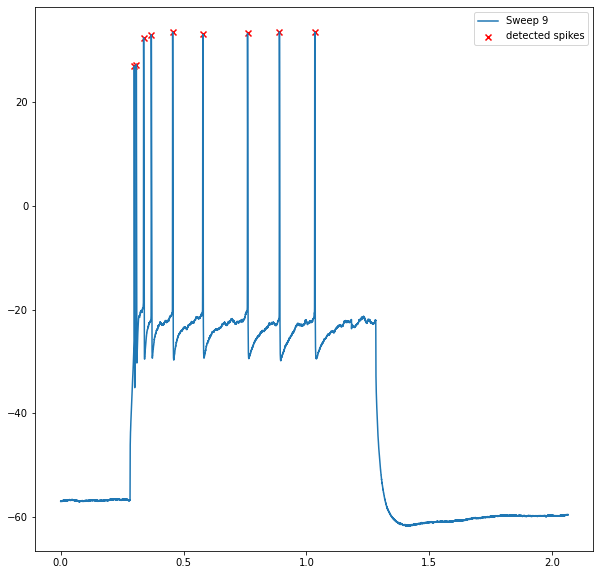

In [29]:
plt.figure(figsize=(10,10))
plt.plot(dataX, dataY, label='Sweep 9')
plt.scatter(dataX[spikes['peak_index'].to_numpy()], dataY[spikes['peak_index'].to_numpy()], label='detected spikes', marker='x', c='r')
plt.legend()